In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv") 
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(32560, 15)

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

This data set is about Census Income

There are 32560 rows and 15 columns inside it.

there are no null values pesent

In [7]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column,'====', unique_count)

Column: Age ==== 73
Column: Workclass ==== 9
Column: Fnlwgt ==== 21647
Column: Education ==== 16
Column: Education_num ==== 16
Column: Marital_status ==== 7
Column: Occupation ==== 15
Column: Relationship ==== 6
Column: Race ==== 5
Column: Sex ==== 2
Column: Capital_gain ==== 119
Column: Capital_loss ==== 92
Column: Hours_per_week ==== 94
Column: Native_country ==== 42
Column: Income ==== 2


In [9]:
data["Sex"].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [10]:
data["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder


In [12]:
ordinal_encoder = OrdinalEncoder()
data[['Income']] = ordinal_encoder.fit_transform(data[['Income']])

In [13]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0.0


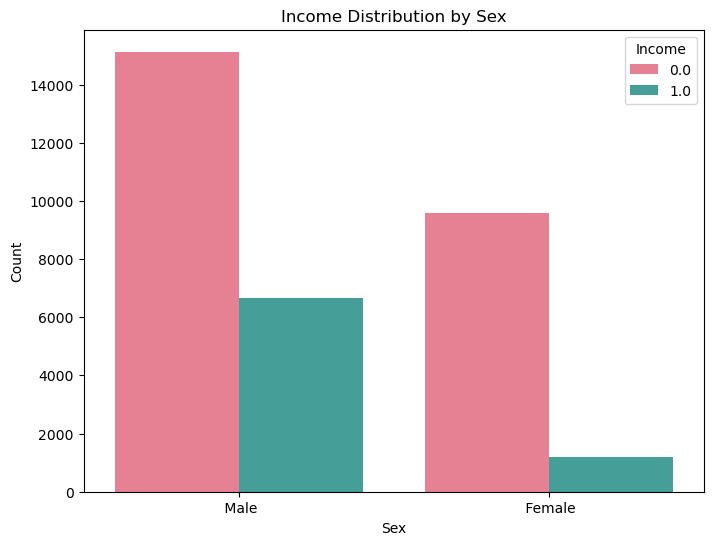

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Income', data=data, palette='husl')
plt.title('Income Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


##### The number of men is more in both types of income.

In [15]:
data["Occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<Figure size 1400x800 with 0 Axes>

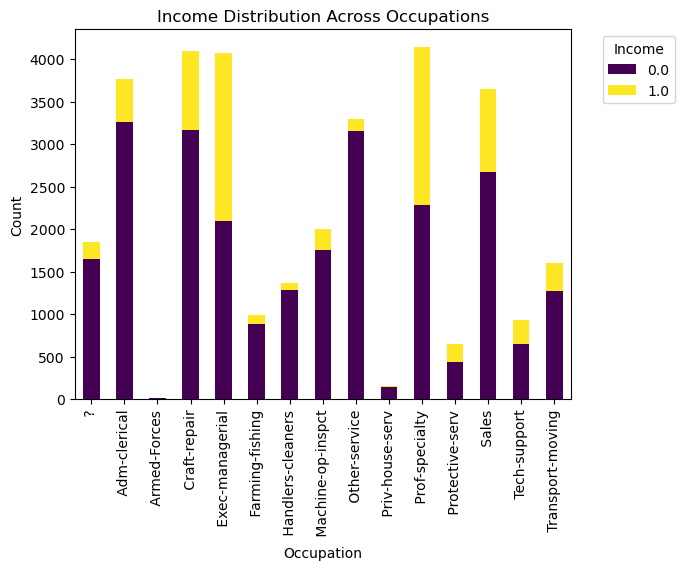

In [16]:
occupation_income_counts = data.groupby(['Occupation', 'Income']).size().unstack()

# Plot a bar chart for each 'Occupation'
plt.figure(figsize=(14, 8))
occupation_income_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Income Distribution Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Most of the income in each occupation is less than 50k.

<Figure size 1400x800 with 0 Axes>

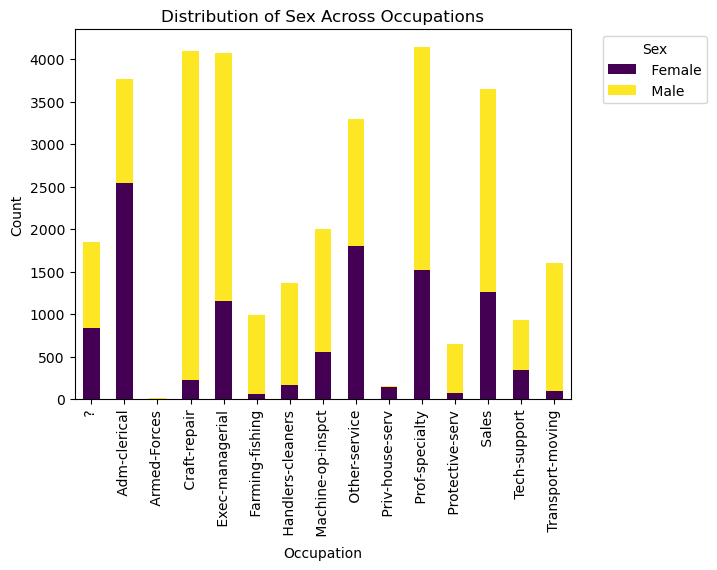

In [17]:
# Convert 'Sex' to categorical
#data['Sex'] = data['Sex'].astype('category')

# Count the occurrences of each combination of 'Occupation' and 'Sex'
occupation_sex_counts = data.groupby(['Occupation', 'Sex']).size().unstack()

# Plot a stacked bar chart for each 'Occupation'
plt.figure(figsize=(14, 8))

# Plotting bars for each occupation
occupation_sex_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Sex Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### There are more women in adm-clerical. There are no women in priv-house-serv. There are very few people in Armed-Forces.
##### The number of males is more in almost all occupations.

<Figure size 1400x800 with 0 Axes>

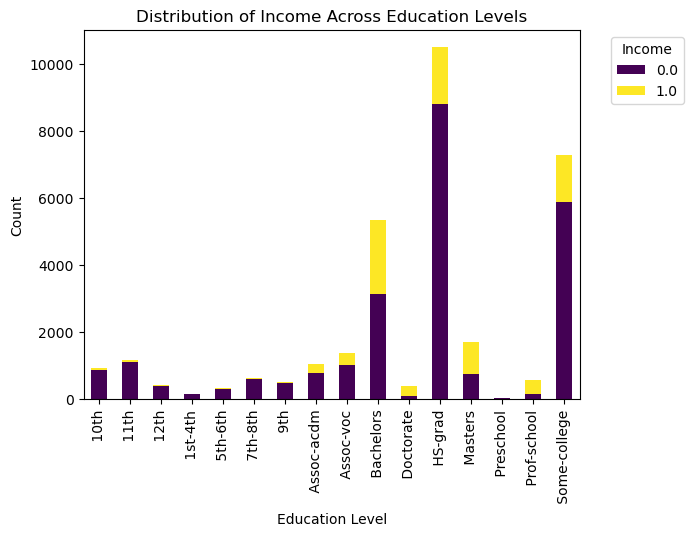

In [18]:

# Count the occurrences of each combination of 'Education' and 'Income'
education_income_counts = data.groupby(['Education', 'Income']).size().unstack()

# Plot a stacked bar chart for each 'Education'
plt.figure(figsize=(14, 8))

# Plotting bars for each education level
education_income_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Income Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Those whose income is more than 50k also have higher education.

In [19]:
data["Workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<Figure size 1400x800 with 0 Axes>

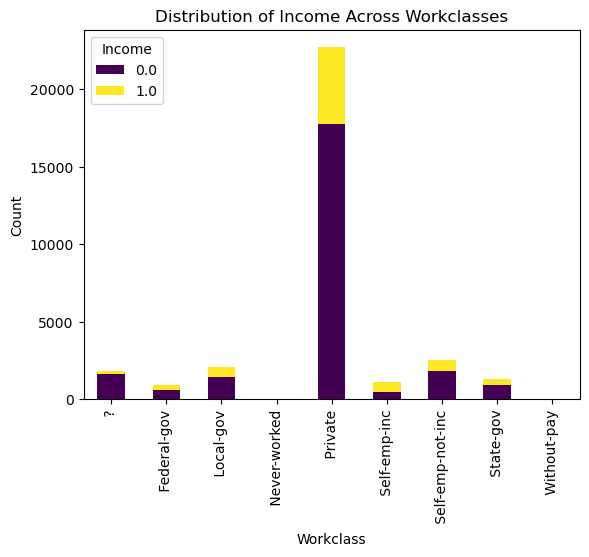

In [20]:
# Count the occurrences of each combination of 'Workclass' and 'Income'
workclass_income_counts = data.groupby(['Workclass', 'Income']).size().unstack()

# Plot a stacked bar chart for each 'Workclass'
plt.figure(figsize=(14, 8))

# Plotting bars for each workclass
workclass_income_counts.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Distribution of Income Across Workclasses')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper left')
plt.show()


##### The largest number are those doing private jobs. And among those who do private jobs, the maximum income of the people is less than 50k?


##### Since there is no null value in any column, we will first encode the column which is not encoded.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])


In [22]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [24]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


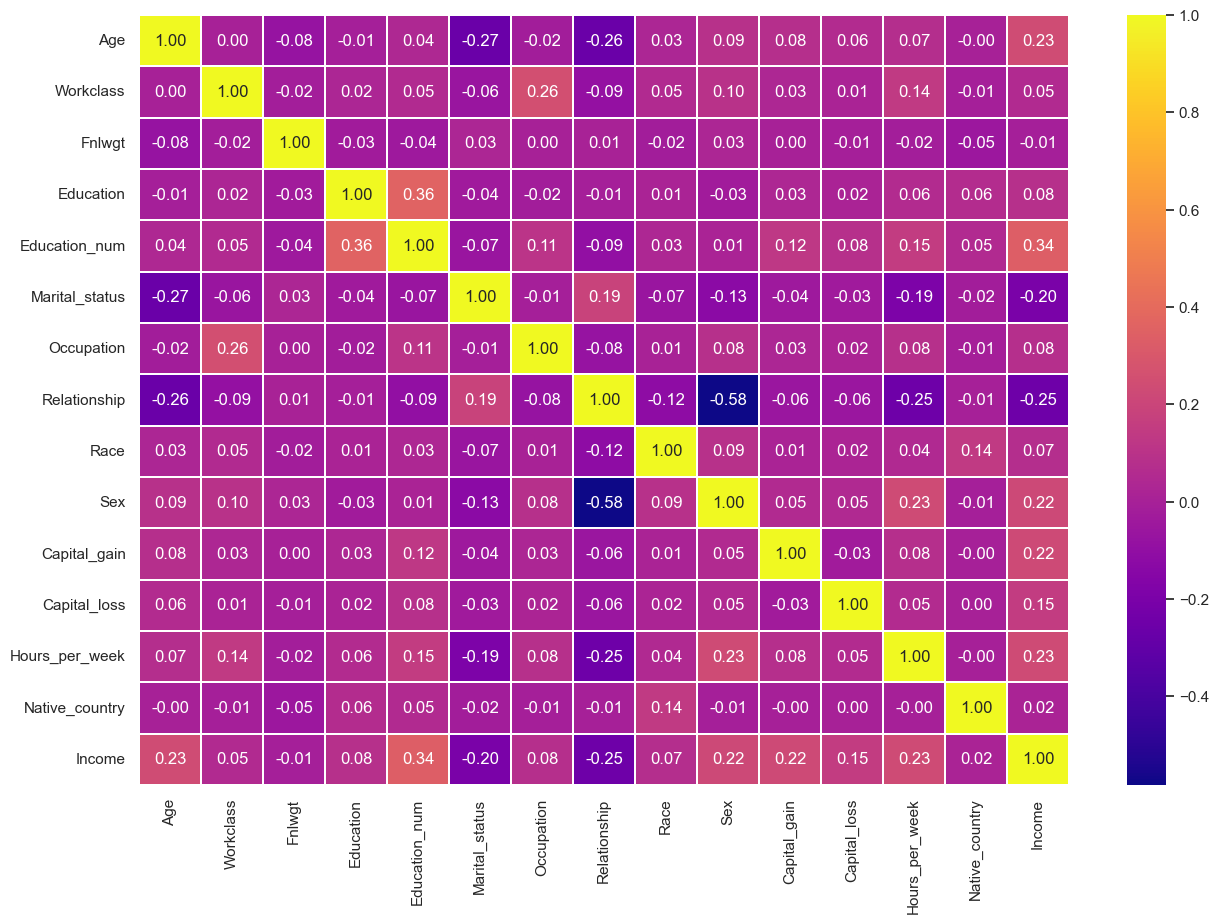

In [25]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1)
sns.heatmap(data.corr(),linewidths=0.2,cmap='plasma', fmt=".2f", annot = True)
plt.show()

###### There is no issue of multicollinearity in any feature.
###### Fnlwgt does not have a good correlation with lable so I will remove it

In [26]:
data.drop(columns=['Fnlwgt'], inplace = True)

In [27]:
data.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


##### We do not need to look for outliers and skewness because all the data is categorical.

In [28]:
## Dividing dependent and independent 
x = data.drop('Income',axis = 1)
y = data['Income']

In [29]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [30]:
abc = 24719*100/32560

In [31]:
abc

75.91830466830467

In [32]:
xyz = 7841*100/32560

In [33]:
xyz

24.081695331695332

##### There is no data imbalancing problem

In [34]:
## After dividing variable I scaled independent variable to normalizes the data
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state= 22)

In [36]:
# Write a function and call as many as time to check accuracy_score of different models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### LogisticRegression

In [38]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [39]:
metric_score(log,x_train,x_test,y_train,y_test, train=True)        # training score 
metric_score(log,x_train,x_test,y_train,y_test, train=False)       # testing score


========================Train Result======================

Accuracy Score:  82.37%

========================Test Result==========================
Accuracy Score:  82.92%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      6218
         1.0       0.72      0.46      0.56      1922

    accuracy                           0.83      8140
   macro avg       0.78      0.70      0.73      8140
weighted avg       0.82      0.83      0.81      8140



In [40]:
y_pred_log= log.predict(x_test)
y_pred_log

array([0., 0., 0., ..., 0., 1., 0.])

In [41]:
conf_mat_log= confusion_matrix(y_test,y_pred_log)            

conf_mat_log

array([[5870,  348],
       [1042,  880]], dtype=int64)

### DecisionTreeClassifier

In [42]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True) 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  97.89%

========================Test Result==========================
Accuracy Score:  81.78%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      6218
         1.0       0.61      0.62      0.62      1922

    accuracy                           0.82      8140
   macro avg       0.75      0.75      0.75      8140
weighted avg       0.82      0.82      0.82      8140



In [44]:
y_pred_clf= clf.predict(x_test)
y_pred_clf

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
conf_mat_clf= confusion_matrix(y_test,y_pred_clf)            

conf_mat_clf

array([[5471,  747],
       [ 736, 1186]], dtype=int64)

### RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
metric_score(rfc,x_train,x_test,y_train,y_test, train=True) 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)      


========================Train Result======================

Accuracy Score:  97.89%

========================Test Result==========================
Accuracy Score:  85.61%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6218
         1.0       0.72      0.63      0.67      1922

    accuracy                           0.86      8140
   macro avg       0.81      0.78      0.79      8140
weighted avg       0.85      0.86      0.85      8140



In [48]:
y_pred_rfc= rfc.predict(x_test)
y_pred_rfc

array([0., 0., 0., ..., 0., 1., 0.])

In [49]:
conf_mat_rfc= confusion_matrix(y_test,y_pred_rfc)            

conf_mat_rfc

array([[5753,  465],
       [ 706, 1216]], dtype=int64)

### KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
metric_score(knn,x_train,x_test,y_train,y_test, train=True) 
metric_score(knn,x_train,x_test,y_train,y_test, train=False)   


========================Train Result======================

Accuracy Score:  87.62%

========================Test Result==========================
Accuracy Score:  83.92%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      6218
         1.0       0.68      0.61      0.64      1922

    accuracy                           0.84      8140
   macro avg       0.78      0.76      0.77      8140
weighted avg       0.83      0.84      0.84      8140



In [52]:
y_pred_knn= knn.predict(x_test)
y_pred_knn

array([0., 0., 1., ..., 0., 1., 0.])

In [53]:
conf_mat_knn= confusion_matrix(y_test,y_pred_knn)            

conf_mat_knn

array([[5651,  567],
       [ 742, 1180]], dtype=int64)

In [54]:
### RandomForestClassifier give me best result so i will choose this

In [55]:
import pickle
pickle.dump(rfc,open('Income____123','wb'))